## 1. Data Collection and Preprocessing
First, we will load the datasets and clean them by handling missing values, duplicates, and standardizing timestamps and address formats.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error


data_1 = pd.read_csv('ds_SSP_PolicyProductivity_SP-BR_utf8_2001-2021_v5.csv')
data_2 = pd.read_csv("ds_SSP_MonthlyOccurences_SP-BR_utf8_2001-2021_v5.csv")
data_3 = pd.read_csv('ds_SSP_CrimeRate_SP-BR_utf8_2001-2020_.csv', sep=';')


In [59]:
pd.DataFrame(data_1.head()) 

,Natureza,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total,Ano,Cidade,Regiao
0,OCORRÊNCIAS DE PORTE DE ENTORPECENTES,115,133,141.0,111.0,153.0,132.0,144.0,176.0,158.0,136.0,97.0,84.0,1580,2019,São Paulo,Capital
1,OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES,556,632,703.0,689.0,767.0,728.0,788.0,698.0,556.0,736.0,570.0,446.0,7869,2019,São Paulo,Capital
2,OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1),34,33,29.0,33.0,52.0,27.0,45.0,40.0,37.0,35.0,27.0,30.0,422,2019,São Paulo,Capital
3,OCORRÊNCIAS DE PORTE ILEGAL DE ARMA,95,76,113.0,108.0,92.0,115.0,96.0,106.0,91.0,91.0,75.0,83.0,1141,2019,São Paulo,Capital
4,Nº DE ARMAS DE FOGO APREENDIDAS,242,224,266.0,279.0,238.0,241.0,231.0,203.0,178.0,214.0,188.0,226.0,2730,2019,São Paulo,Capital


In [60]:
pd.DataFrame(data_1.dtypes)

,0
Natureza,object
Jan,int64
Fev,int64
Mar,float64
Abr,float64
Mai,float64
Jun,float64
Jul,float64
Ago,float64
Set,float64


In [61]:
pd.DataFrame(data_2.head())

,Natureza,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total,Ano,Cidade,Regiao
0,HOMICÍDIO DOLOSO (2),55.0,48.0,75.0,59.0,45.0,46.0,53.0,40.0,52.0,62.0,62.0,53.0,650.0,2019,São Paulo,Capital
1,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO (3),56.0,48.0,85.0,59.0,50.0,48.0,55.0,42.0,57.0,66.0,63.0,56.0,685.0,2019,São Paulo,Capital
2,HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2019,São Paulo,Capital
3,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2019,São Paulo,Capital
4,HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO,66.0,31.0,31.0,22.0,47.0,30.0,34.0,38.0,26.0,36.0,28.0,32.0,421.0,2019,São Paulo,Capital


In [62]:
pd.DataFrame(data_2.dtypes)

,0
Natureza,object
Jan,float64
Fev,float64
Mar,float64
Abr,float64
Mai,float64
Jun,float64
Jul,float64
Ago,float64
Set,float64


In [63]:
pd.DataFrame(data_3.head())

,Ano,Homicídio Doloso por 100 mil habitantes,Furto por 100 mil habitantes,Roubo por 100 mil habitantes,Furto e Roubo de Veículo por 100 mil habitantes,Furto por 100 mil veículos,Roubo por 100 mil veículos,Furto e Roubo de Veículo por 100 mil veículos,Cidade,Regiao
0,1999.0,"52,58","1.085,19","1.068,39","1.108,17",-,-,-,São Paulo,Capital
1,2000.0,"51,23","1.034,32","1.046,44","1.175,01",-,-,-,São Paulo,Capital
2,2001.0,"49,16","1.099,04","1.066,06","1.032,52","1.423,03","1.275,53","2.698,56",São Paulo,Capital
3,2002.0,"43,63","1.190,92","1.137,27","907,16","1.249,70","1.035,15","2.284,84",São Paulo,Capital
4,2003.0,"39,97","1.333,79","1.237,66","868,17","1.158,55","946,79","2.105,34",São Paulo,Capital


In [64]:
pd.DataFrame(data_3.dtypes)

,0
Ano,float64
Homicídio Doloso por 100 mil habitantes,object
Furto por 100 mil habitantes,object
Roubo por 100 mil habitantes,object
Furto e Roubo de Veículo por 100 mil habitantes,object
Furto por 100 mil veículos,object
Roubo por 100 mil veículos,object
Furto e Roubo de Veículo por 100 mil veículos,object
Cidade,object
Regiao,object


## 2. Data Cleaning
We will clean the data by handling missing values, removing duplicates, and fixing format inconsistencies.

In [65]:
float_int1 = "Mar", "Abr",	"Mai",	"Jun", 	"Jul", 	"Ago", "Set",	"Out",	"Nov", "Dez", "Ano"
for floats in float_int1:
	data_1[floats] = data_1[floats].fillna(0).astype(int)
pd.DataFrame(data_1.dtypes)

,0
Natureza,object
Jan,int64
Fev,int64
Mar,int64
Abr,int64
Mai,int64
Jun,int64
Jul,int64
Ago,int64
Set,int64


In [66]:
float_int2 = "Jan","Fev","Mar", "Abr",	"Mai",	"Jun", 	"Jul", 	"Ago", "Set",	"Out",	"Nov", "Dez", "Total"
for floats in float_int2:
	data_2[floats] = data_2[floats].fillna(0).astype(int)
pd.DataFrame(data_2.dtypes)

,0
Natureza,object
Jan,int64
Fev,int64
Mar,int64
Abr,int64
Mai,int64
Jun,int64
Jul,int64
Ago,int64
Set,int64


In [67]:
# "." and "," are switched
switch = "Homicídio Doloso por 100 mil habitantes", "Furto por 100 mil habitantes",	"Roubo por 100 mil habitantes",	"Furto e Roubo de Veículo por 100 mil habitantes", "Furto por 100 mil veículos", "Roubo por 100 mil veículos",	"Furto e Roubo de Veículo por 100 mil veículos"

for col in switch:
# Swap periods (.) with commas (,) and vice versa
	data_3[col] = data_3[col].str.replace('.', 'TEMP', regex=False)  # Temp = placeholder
	data_3[col] = data_3[col].str.replace(',', '.', regex=False)  # Replace commas with periods
	data_3[col] = data_3[col].str.replace('TEMP', ',', regex=False)  # Replace the TEMP with commas
	data_3[col] = pd.to_numeric(data_3[col], errors="coerce").fillna(0)

data_3 = data_3.dropna(subset=["Ano"])
data_3['Ano'] = data_3['Ano'].astype(int)

pd.DataFrame(data_3.dtypes)

,0
Ano,int64
Homicídio Doloso por 100 mil habitantes,float64
Furto por 100 mil habitantes,float64
Roubo por 100 mil habitantes,float64
Furto e Roubo de Veículo por 100 mil habitantes,float64
Furto por 100 mil veículos,float64
Roubo por 100 mil veículos,float64
Furto e Roubo de Veículo por 100 mil veículos,float64
Cidade,object
Regiao,object


In [68]:
# cleaned data
pd.DataFrame(data_1.head(3))

,Natureza,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total,Ano,Cidade,Regiao
0,OCORRÊNCIAS DE PORTE DE ENTORPECENTES,115,133,141,111,153,132,144,176,158,136,97,84,1580,2019,São Paulo,Capital
1,OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES,556,632,703,689,767,728,788,698,556,736,570,446,7869,2019,São Paulo,Capital
2,OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES(1),34,33,29,33,52,27,45,40,37,35,27,30,422,2019,São Paulo,Capital


In [69]:
pd.DataFrame(data_2.head(3))

,Natureza,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total,Ano,Cidade,Regiao
0,HOMICÍDIO DOLOSO (2),55,48,75,59,45,46,53,40,52,62,62,53,650,2019,São Paulo,Capital
1,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO (3),56,48,85,59,50,48,55,42,57,66,63,56,685,2019,São Paulo,Capital
2,HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO,0,0,0,0,0,1,2,0,0,0,0,0,3,2019,São Paulo,Capital


In [70]:
pd.DataFrame(data_3.head(3))

,Ano,Homicídio Doloso por 100 mil habitantes,Furto por 100 mil habitantes,Roubo por 100 mil habitantes,Furto e Roubo de Veículo por 100 mil habitantes,Furto por 100 mil veículos,Roubo por 100 mil veículos,Furto e Roubo de Veículo por 100 mil veículos,Cidade,Regiao
0,1999,52.58,0.0,0.0,0.0,0.0,0.0,0.0,São Paulo,Capital
1,2000,51.23,0.0,0.0,0.0,0.0,0.0,0.0,São Paulo,Capital
2,2001,49.16,0.0,0.0,0.0,0.0,0.0,0.0,São Paulo,Capital


## 3. Exploratory Data Analysis (EDA)
We will analyze the data trends and visualize them to understand crime patterns over time, across neighborhoods, and by crime type.

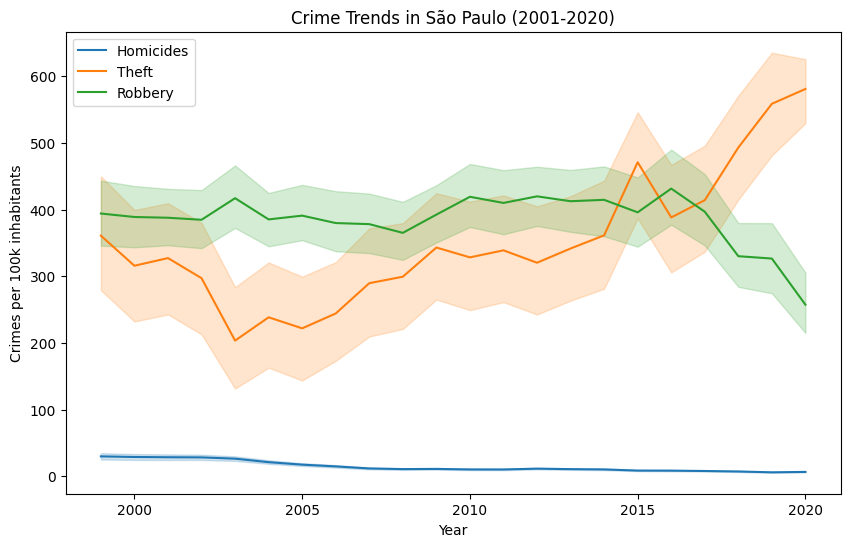

In [71]:
# Temporal analysis: Plotting crime trends over time
plt.figure(figsize=(10,6))
sns.lineplot(x=data_3['Ano'], y=data_3['Homicídio Doloso por 100 mil habitantes'], label='Homicides')
sns.lineplot(x=data_3['Ano'], y=data_3['Furto por 100 mil habitantes'], label='Theft')
sns.lineplot(x=data_3['Ano'], y=data_3['Roubo por 100 mil habitantes'], label='Robbery')
plt.title('Crime Trends in São Paulo (2001-2020)')
plt.xlabel('Year')
plt.ylabel('Crimes per 100k inhabitants')
plt.legend()
plt.show()

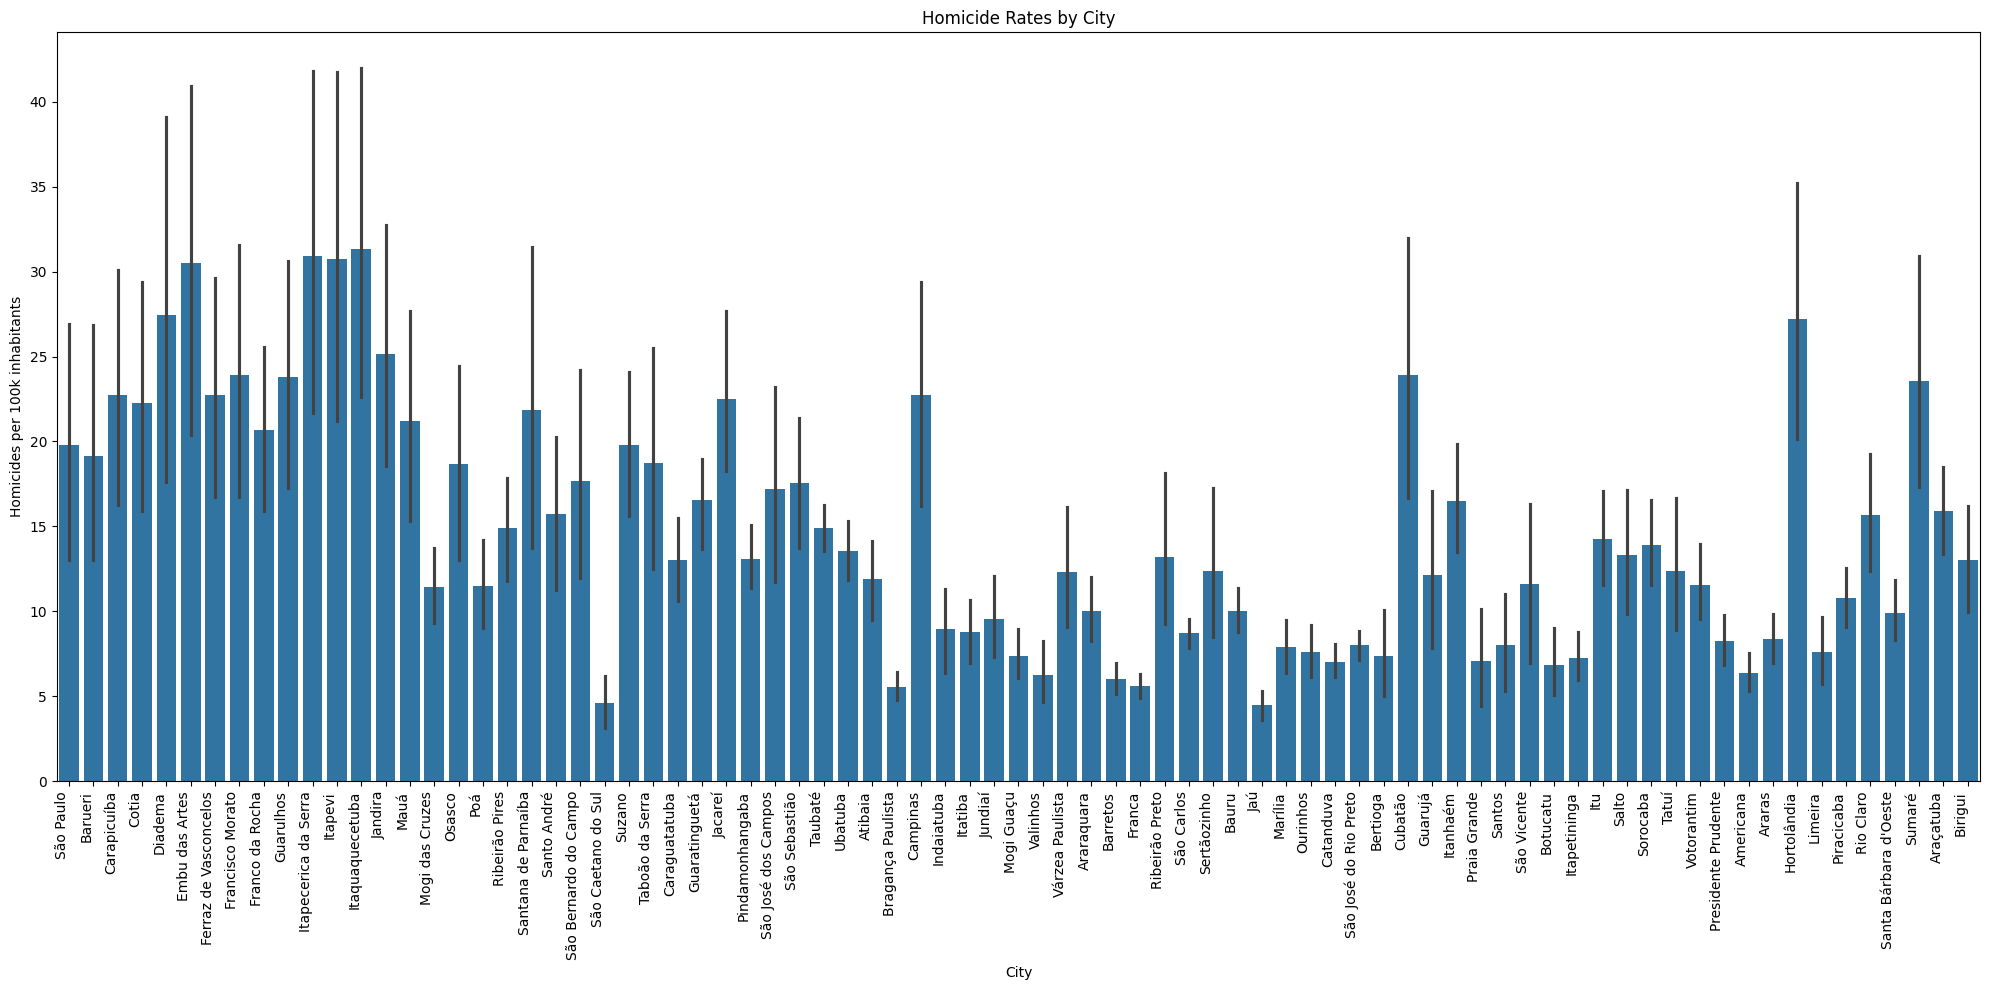

In [72]:

plt.figure(figsize=(20, 10))

sns.barplot(x='Cidade', y='Homicídio Doloso por 100 mil habitantes', data=data_3)

plt.title('Homicide Rates by City')
plt.xlabel('City')
plt.ylabel('Homicides per 100k inhabitants')

plt.xticks(rotation=90, ha='right')

plt.tight_layout() 
plt.show()


# 4. Predictive Modeling

## Encoding 'Cidade' Column

In [73]:

from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'Cidade' with the corrected argument 'sparse_output'
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cities = encoder.fit_transform(data_3[['Cidade']])

# Convert encoded cities to DataFrame and combine with original data
encoded_cities_df = pd.DataFrame(encoded_cities, columns=encoder.get_feature_names_out(['Cidade']))
data_3_encoded = pd.concat([data_3.drop(columns=['Cidade']), encoded_cities_df], axis=1)

# Now data_3_encoded is ready for use in modeling
data_3_encoded.head()
    

,Ano,Homicídio Doloso por 100 mil habitantes,Furto por 100 mil habitantes,Roubo por 100 mil habitantes,Furto e Roubo de Veículo por 100 mil habitantes,Furto por 100 mil veículos,Roubo por 100 mil veículos,Furto e Roubo de Veículo por 100 mil veículos,Regiao,Cidade_Araraquara,...,Cidade_São Paulo,Cidade_São Sebastião,Cidade_São Vicente,Cidade_Taboão da Serra,Cidade_Tatuí,Cidade_Taubaté,Cidade_Ubatuba,Cidade_Valinhos,Cidade_Votorantim,Cidade_Várzea Paulista
0,1999.0,52.58,0.0,0.0,0.00,0.0,0.00,0.0,Capital,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000.0,51.23,0.0,0.0,0.00,0.0,0.00,0.0,Capital,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001.0,49.16,0.0,0.0,0.00,0.0,0.00,0.0,Capital,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002.0,43.63,0.0,0.0,907.16,0.0,0.00,0.0,Capital,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003.0,39.97,0.0,0.0,868.17,0.0,946.79,0.0,Capital,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Defining Features for Modeling

In [74]:

# Define the features to be used in modeling
features = [
    'Ano', 'Homicídio Doloso por 100 mil habitantes', 'Furto por 100 mil habitantes', 
    'Furto e Roubo de Veículo por 100 mil habitantes', 'Furto por 100 mil veículos', 
    'Roubo por 100 mil veículos', 'Furto e Roubo de Veículo por 100 mil veículos'
] + list(encoded_cities_df.columns)  # Include encoded city columns
    

## Random Forest Classifier (Robbery Likelihood)

In [75]:

#(Robbery likelihood)
X_class = data_3_encoded[features].fillna(data_3_encoded[features].median())  
y_class = (data_3_encoded['Roubo por 100 mil habitantes'] > 0).astype(int)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class, y_train_class)

# Evaluatey_pred_class = clf.predict(X_test_class)
print(classification_report(y_test_class, y_pred_class))
    

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       119
           1       0.98      1.00      0.99       515

    accuracy                           0.98       634
   macro avg       0.98      0.94      0.96       634
weighted avg       0.98      0.98      0.98       634



## Gradient Boosting Regressor (Theft Rate Prediction)

In [76]:
# Features for regression (Theft rate)
X_reg = data_3_encoded[features].fillna(data_3_encoded[features].median())
y_reg = data_3_encoded['Furto por 100 mil habitantes']
y_reg = y_reg.fillna(y_reg.median())


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)



# Initialize and train Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train_reg, y_train_reg)

y_pred_gb = gb_reg.predict(X_test_reg)
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(y_test_reg, y_pred_gb)}")
    

Mean Squared Error for Gradient Boosting: 3.1873603211914787


## 5. Conclusion
The analysis and predictions provide insights into the crime patterns in São Paulo. Predictive models can help in understanding the likelihood of robbery and estimating the potential value of items stolen in different neighborhoods.


## How to Run the Project
1. Clone the repository and install the dependencies
2. Run this Jupyter Notebook to perform the analysis and predictions.
3. Modify the parameters as needed to adapt the models and visualizations.